In [252]:
!pip install pandas
!pip install html5lib 
!pip install numpy
!pip install matplotlib

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/7.6 MB 2.0 MB/s eta 0:00:04
     - -------------------------------------- 0.2/7.6 MB 2.5 MB/s eta 0:00:03
     - -------------------------------------- 0.3/7.6 MB 2.2 MB/s eta 0:00:04
     - -------------------------------------- 0.4/7.6 MB 2.3 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/7.6 MB 2.4 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/7.6 MB 2.1 MB/s eta 0:00:04
     --- ------------------------------------ 0.7/7.6 MB 2.1 MB/s eta 0:00:04
     ---- ----------------------------------- 0.8/7.6 MB 2.1 MB/s eta 0:00:04
     ---- ----------------------------------- 0.9/7.6 MB 2.2 MB/s eta 0:00:04
     ---- ----------------------------------- 1.0/7.6 MB 2.2 MB/s eta 0:00:04
     ----- ---------------------------------- 1.1/7.6 MB 2.2 MB/s eta 0:00:04
     ----- ---------------------------------- 1.1/7.6 MB 2.1 MB/s eta 0

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [266]:
# tmp = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96",
#                   match="Коефіцієнт народжуваності у регіонах України у 1950—2014 роках",
#                   thousands=r",")

tmp = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C",
                   match="Коефіцієнт народжуваності в регіонах України",
                  thousands='.')
df = tmp[0]
df = df.apply(lambda x: x.str.replace(',','.'))


1. Вивести перші рядки таблиці за допомогою методу head

In [267]:
df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


2. Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [268]:
df.shape

(28, 9)

3. Замініть у таблиці значення "—" на значення NaN

In [269]:
df.replace({"—": np.NaN}, inplace = True)


4. Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [270]:
df.dtypes


Регіон    object
1950      object
1960      object
1970      object
1990      object
2000      object
2012      object
2014      object
2019      object
dtype: object

5. Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [271]:
df = df.apply(pd.to_numeric, errors='ignore')
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

6. Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [272]:
pd.isnull(df).sum(0)


Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

7. Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [273]:
df.drop(27, inplace=True)
df.tail(3)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
24,Чернігівська,22.0,18.3,12.7,10.8,6.9,9.4,9.0,6.1
25,Київ,NaN,17.4,15.9,12.0,7.3,12.0,12.1,11.0
26,Севастополь,NaN,NaN,NaN,12.5,7.0,12.0,NaN,NaN


8. Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [274]:
df.fillna({x: df[x].mean() for x in df.columns[1:]})
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


9. Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [275]:
# new_df = df.loc[:,['Регіон', '2019']]
df[df['2019']>df['2019'].mean()].loc[:,['Регіон']]

,Регіон
2,Волинська
6,Закарпатська
8,Івано-Франківська
12,Львівська
14,Одеська
16,Рівненська
20,Херсонська
23,Чернівецька
25,Київ


10. У якому регіоні була найвища народжуваність у 2014 році?

In [276]:
# max_x = df.iloc[df.loc[df['2014'].idxmax()].name].loc[:,'2014']
df.loc[df['2014'].idxmax(),['Регіон','2014']]


Регіон    Рівненська
2014            14.8
Name: 16, dtype: object

11. Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

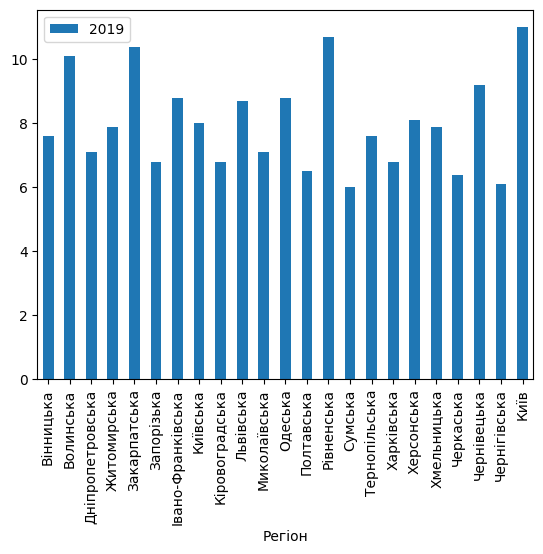

In [292]:
df_to_plot = df[["Регіон","2019"]].dropna()
df_to_plot.plot(kind = 'bar', x = 'Регіон', y = '2019')
plt.show()